# PART3 パラメータをチューニングしてみよう

## おまじない

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう

In [8]:
train = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample = pd.read_csv("submit_sample.csv",header=None)

## trainから説明変数となるデータを取り出しましょう
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入しましょう

In [9]:
train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1
5,6,29,blue-collar,single,secondary,no,260,yes,no,unknown,2,jun,707,14,-1,0,unknown,1
6,7,37,services,married,secondary,no,52,yes,no,cellular,6,sep,908,1,185,9,success,1
7,8,32,technician,single,secondary,no,230,yes,no,cellular,18,may,442,1,266,8,failure,1
8,9,31,admin.,single,secondary,no,0,yes,no,cellular,7,may,895,2,295,2,failure,1
9,10,32,self-employed,single,tertiary,no,1815,no,no,telephone,10,aug,235,1,102,2,failure,1


In [10]:
trainX = train.iloc[:,0:17]
trainX

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success
5,6,29,blue-collar,single,secondary,no,260,yes,no,unknown,2,jun,707,14,-1,0,unknown
6,7,37,services,married,secondary,no,52,yes,no,cellular,6,sep,908,1,185,9,success
7,8,32,technician,single,secondary,no,230,yes,no,cellular,18,may,442,1,266,8,failure
8,9,31,admin.,single,secondary,no,0,yes,no,cellular,7,may,895,2,295,2,failure
9,10,32,self-employed,single,tertiary,no,1815,no,no,telephone,10,aug,235,1,102,2,failure


## trainから目的変数となるデータを取り出しましょう
- yを選択し、変数yに代入しましょう

In [16]:
y = train["y"]
y

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       0
20       0
21       0
22       1
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
27098    0
27099    0
27100    0
27101    0
27102    0
27103    0
27104    0
27105    1
27106    0
27107    0
27108    1
27109    0
27110    0
27111    0
27112    0
27113    0
27114    0
27115    1
27116    0
27117    0
27118    0
27119    0
27120    0
27121    0
27122    0
27123    0
27124    0
27125    0
27126    0
27127    0
Name: y, Length: 27128, dtype: int64

## testから説明変数となるデータを取り出しましょう
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入します

In [12]:
testX = test.copy()

## trainXとtestXをダミー変数化しましょう

In [13]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)
trainX.head()

,id,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,39,1756,3,939,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,51,1443,18,172,10,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,36,436,13,567,1,595,2,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,63,474,25,423,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,31,354,30,502,1,9,2,0,0,...,0,0,0,0,0,0,0,0,1,0


## 決定木モデルの箱を用意しましょう
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としましょう

In [14]:
clf1 = DT(max_depth=2,min_samples_leaf=500)

## クロスバリデーションをしてclf1の精度を確かめてみましょう
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [15]:
cross_validate(clf1,trainX,y,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)

{'fit_time': array([0.0733614 , 0.06837368, 0.06437969, 0.07186556, 0.0718646 ]),
 'score_time': array([0.00798774, 0.00548983, 0.00499201, 0.00648832, 0.00549436]),
 'test_score': array([0.74657601, 0.76182968, 0.73117591, 0.73708019, 0.75909278]),
 'train_score': array([0.74534692, 0.74543889, 0.75305367, 0.75162308, 0.74613685])}

## 異なるパラメータでもう一度決定木の箱を準備しましょう
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [35]:
clf2 = DT(max_depth=10,min_samples_leaf=500)

## クロスバリデーションをしてclf2の精度を確かめてみましょう

In [36]:
cross_validate(clf2,trainX,y,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)

{'fit_time': array([0.18512845, 0.15011024, 0.18965054, 0.15560055, 0.14961338]),
 'score_time': array([0.00600481, 0.00700688, 0.00600719, 0.00650382, 0.00550437]),
 'test_score': array([0.88264002, 0.88482571, 0.86778474, 0.89238631, 0.88344359]),
 'train_score': array([0.88842017, 0.89038512, 0.89288003, 0.88763037, 0.88561317])}

## 新たな決定木モデルの箱を準備しましょう
- 変数clf3とし、今回は特にパラメータはセットしません

In [37]:
clf3 = DT()

## グリッドサーチを試してみましょう
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [38]:
parameters ={"max_depth":list(range(2,11))}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探してみましょう

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [47]:
gcv = GridSearchCV(clf3,parameters,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)
gcv.fit(trainX,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

## グリッドサーチの結果を見てみましょう
- cv_____results_で結果を見る事が出来ます

In [48]:
gcv.cv_results_

{'mean_fit_time': array([0.09539042, 0.15090885, 0.1960391 , 0.20614629, 0.25918365,
        0.2850018 , 0.3025146 , 0.35645275, 0.35074835]),
 'mean_score_time': array([0.00950856, 0.0110085 , 0.00940719, 0.00770569, 0.00810633,
        0.00820675, 0.00810647, 0.01050797, 0.00840697]),
 'mean_test_score': array([0.74715003, 0.80746041, 0.81410356, 0.82269596, 0.82624299,
        0.82518201, 0.80563282, 0.79552226, 0.77967103]),
 'mean_train_score': array([0.74831988, 0.81244475, 0.84413657, 0.85726168, 0.86925483,
        0.88601268, 0.89895355, 0.91018246, 0.92422432]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'ran

## cv_____results_の中で重要な２つをみてみましょう
- cv_____results_["mean_train_score"]とcv_____results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [49]:
train_score = gcv.cv_results_["mean_train_score"]

In [51]:
test_score = gcv.cv_results_["mean_test_score"]
test_score

array([0.74715003, 0.80746041, 0.81410356, 0.82269596, 0.82624299,
       0.82518201, 0.80563282, 0.79552226, 0.77967103])

## train_scoreとtest_scoreを可視化しましょう
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x1dae6461518>,
 <a list of 9 Text xticklabel objects>)

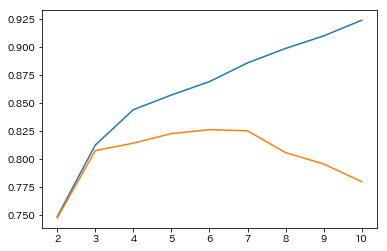

In [60]:
plt.plot(train_score)
plt.plot(test_score)
list_a = list(range(0,9))
list_b = list(range(2,11))
plt.xticks(list_a,list_b)

## グリッドサーチで選ばれたパラメータを確認しましょう
- best_____params_で結果を見ることができます

In [61]:
gcv.best_params_

{'max_depth': 6}

## testの予測しましょう
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [63]:
pred = gcv.predict_proba(testX)

In [64]:
pred = pred[:,1]

## predをsample[1]に代入してファイル出力し、DeepAnalyticsへ投稿しましょう
- ファイル名は「submit3_bank.csv」としましょう
- index=None,header=Noneのオプションを忘れないように書きだしましょう

In [66]:
sample[1] = pred
sample.to_csv("submit3_bank.csv",index = None,header=None)

# 実習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [4]:
clf4 = DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [5]:
parameters2 = {"max_depth":list(range(2,11)),"min_samples_leaf":[5,10,20,50,100,500]}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探そう。グリッドサーチの結果は変数gcv2に代入しよう

In [6]:
gcv2 = GridSearchCV(clf4,parameters2,cv=5,scoring = "roc_auc",n_jobs=-1)
gcv2.fit(trainX,y)

NameError: name 'trainX' is not defined

4.最適なパラメータはなんだったか確かめてみよう

In [77]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入しよう

In [79]:
pred2 = gcv2.predict_proba(testX)

In [80]:
pred2 = pred2[:,1]

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力し、DeepAnalyticsへ投稿しよう

In [81]:
sample[1] = pred2
sample.to_csv("submit4_bank.csv",header = None,index=None)